In [82]:
import paddle
from paddle.nn import Transformer
from paddle.io import Dataset
import os
from tqdm import tqdm
import time
import numpy as np
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score
import nltk
from rouge import Rouge

In [83]:
#predict_commet_path='result.txt'
predict_commet_path='result_other.txt'
real_comment_path='comment.txt'

In [84]:
def creat_dataset(a,b):
    with open(a,encoding='utf-8') as tc:
        lines1=tc.readlines()
        for i in range(len(lines1)):
             lines1[i]=lines1[i].strip('\n')
    with open(b,encoding='utf-8') as ts:
        lines2=ts.readlines()
        for i in range(len(lines2)):
            lines2[i]=lines2[i].strip('\n')
        del lines2[20000:]
    if len(lines1)!=len(lines2):
        print(len(lines1),len(lines2))
    return lines1,lines2

predict_comment,real_comment=creat_dataset(predict_commet_path,real_comment_path)

In [85]:
rouge = Rouge()

In [136]:
bleu_scores = 0
rough_scores_RLCS_L1 = 0
rough_scores_PLCS_L1 = 0
rough_scores_FLCS_L1 = 0
meteor_scores = 0
totalid = []
total_bleu = []
total_meteor= []
total_rough_RLCS = []
total_rough_PLCS = []
total_rough_FLCS = []
for i in range(20000):
    totalid.append(i+1)
    #bleu
    bleu_scores += sentence_bleu(real_comment[i], predict_comment[i], weights=[1])
    total_bleu.append(bleu_scores/(i+1))
    #mentor score
    x = real_comment[i].split()
    y = predict_comment[i].split()
    meteor_scores += meteor_score([x],y)
    total_meteor.append(meteor_scores/(i+1))
    #rough score
    rough_scores = rouge.get_scores(predict_comment[i], real_comment[i])
    for i in rough_scores[0].items():
        value = i[1]
        middle = 0
        for j in value.items():
            rough_score = j[1]
            if middle==0:
                total_rough_RLCS.append(rough_score)
                rough_scores_RLCS_L1 +=rough_score
            if middle==1:
                total_rough_PLCS.append(rough_score)
                rough_scores_PLCS_L1 +=rough_score
            if middle==2:
                total_rough_FLCS.append(rough_score)
                rough_scores_FLCS_L1 +=rough_score
            middle+=1
        break

In [145]:
print(bleu_score/20000)
print(meteor_scores/20000)
print(rough_scores_FLCS_L1/20000)
print(rough_scores_PLCS_L1/20000)
print(rough_scores_RLCS_L1/20000)
print(len(total_rough_FLCS))

0.3367650469838718
0.3909331202215102
0.4108513964149004
0.42957556874138736
0.41916755771064
20000


Text(0.5, 0, 'number of sentences')

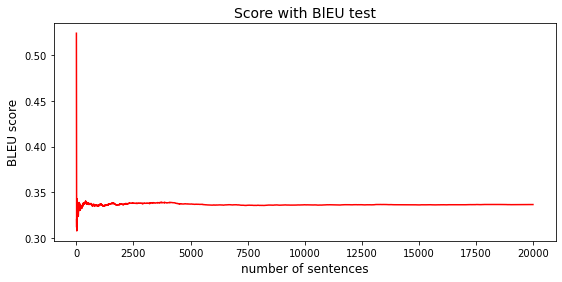

In [149]:
fig, ax2 = plt.subplots(figsize=(9, 4))
resource1 = ax2.plot(totalid, total_bleu,color="red",label="BLEU")
ax2.set_ylabel('BLEU score',fontsize=12)
ax2.set_title('Score with BlEU test',fontsize=14)
ax2.set_xlabel("number of sentences",fontsize=12)




Text(0.5, 0, 'number of sentences')

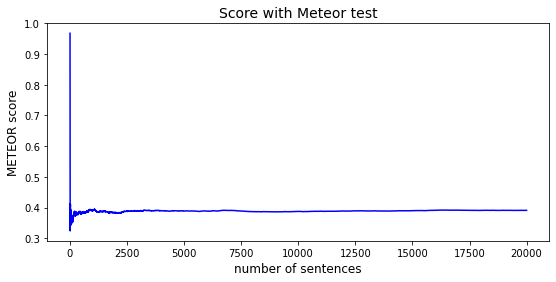

In [102]:
fig, ax1 = plt.subplots(figsize=(9, 4))
resource1 = ax1.plot(totalid, total_meteor,color="blue",label="METEOR")
ax1.set_ylabel('METEOR score',fontsize=12)
ax1.set_title('Score with Meteor test',fontsize=14)
ax1.set_xlabel("number of sentences",fontsize=12)

Text(0.5, 0, 'number of sentences')

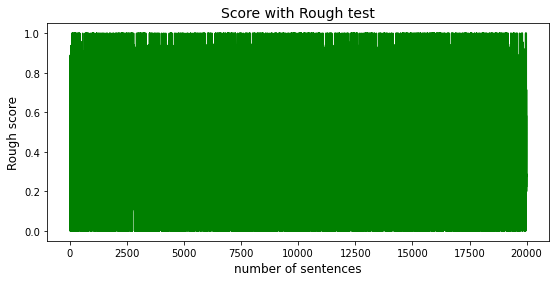

In [144]:
fig, ax3 = plt.subplots(figsize=(9, 4))
resource3 = ax3.plot(totalid, total_rough_PLCS,color="green",label="ROUGH")
ax3.set_ylabel('Rough score',fontsize=12)
ax3.set_title('Score with Rough test',fontsize=14)
ax3.set_xlabel("number of sentences",fontsize=12)

Text(0.5, 1.0, 'Different rough score Scope')

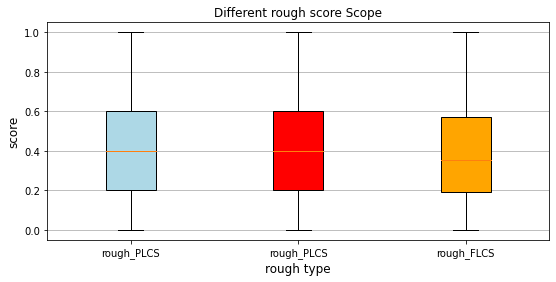

In [148]:
all_data = [total_rough_PLCS,total_rough_PLCS,total_rough_FLCS]
labels = ['rough_PLCS','rough_PLCS','rough_FLCS']
fig, ax4 = plt.subplots(figsize=(9, 4))


bplot1 = ax4.boxplot(all_data,0,'',
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax4.set_title('Rough scores',fontsize=12)

# fill with colors
colors = ['lightblue', 'red','orange']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
ax4.yaxis.grid(True)
ax4.set_xlabel('rough type',fontsize=12)
ax4.set_ylabel('score',fontsize=12)
ax4.set_title('Different rough score Scope')


In [33]:
state_dict = paddle.load("trans_net.pdparams")
#prog.set_state_dict(state_dict)

In [35]:
paddle.metric.metrics.Metric
paddle.metric.metrics.Accuracy
paddle.metric.metrics.Auc
paddle.metric.metrics.Precision
paddle.metric.metrics.Recall

paddle.metric.metrics.Metric

In [153]:
code_path='camel_code-Copy2.txt'
with open('result_other.txt','r') as re:
    pre=re.readlines()

with open(code_path,'r',encoding='utf-8', errors='ignore') as scode:
    code=scode.readlines()

with open(real_comment_path,'r') as scomment:
    comment=scomment.readlines()

for i in range(5):
    print('code: ',code[i].strip())
    print('真实注释：',comment[i].strip())
    print('预测注释：',pre[i])


code:  public synchronized void info ( string msg ) { log record record = new log record ( level . info , msg ) ; log ( record ) ; }
真实注释： logs a info message
预测注释： log a info message . 

code:  public void handle gateway receiver create ( gateway receiver recv ) throws management exception { if ( ! is service initialised ( str_ ) ) { return ; } if ( ! recv . is manual start ( ) ) { return ; } create gateway receiver m bean ( recv ) ; }
真实注释： handles gateway receiver creation
预测注释： handle a new signal receiver . 

code:  public void data changed ( i data provider data provider ) ;
真实注释： this method will be notified by data provider whenever the data changed in data provider
预测注释： invoked when the data of the data provider has changed . 

code:  public void range ( i hypercube space , i visit kd node visitor ) { if ( root == null ) { return ; } root . range ( space , visitor ) ; }
真实注释： locate all points within the twodtree that fall within the given ihypercube and visit those nodes via